In [24]:
import pandas as pd  # manipulação e análise de dados.
import numpy as np #  arrays, matrizes e funções matemáticas
import matplotlib.pyplot as plt #  módulo matplotlib para gráficos
import matplotlib.cm as cm  # módulo matplotlib para manipular cores
import seaborn as sns # vizualizacao de dados e criacao de graficos
import plotly.express as px # graficos interativos (pouco codigo)
import matplotlib.font_manager as fm  # Listar fontes disponíveis
import matplotlib.gridspec as gridspec # Mais flexibilidade para organizar seus gráficos no dashboard.

In [25]:
# ... (código para ler o dataset - substitua pelo path de seu arquivo viia upload) ...
# A linha countryData.drop("Unnamed: 0", axis = 1) remove uma coluna desnecessária chamada "Unnamed: 0", que provavelmente foi criada durante a exportação do CSV.

countryData = pd.read_csv("/content/countryData.csv").drop("Unnamed: 0", axis = 1)
countryData

,country,year,Access to electricity,Electricity production(coal),Energy use per capita,co2 emissions,Inflation,Exports,GDP Growth(Annual),GDP Per Capita (USD)
0,BGD,2011,59.599998,1.873032,212.058286,72.875055,NaN,NaN,NaN,NaN
1,BGD,2012,66.155571,1.927433,219.972662,71.993094,6.217504,12.532259,6.521459,883.117130
2,BGD,2013,61.500000,2.306099,222.061405,71.590639,7.530406,2.451884,6.013606,981.860851
3,BGD,2014,62.400002,1.969738,229.250540,72.052527,6.991639,3.201149,6.061059,1118.873808
4,BGD,2015,74.903740,1.689516,NaN,68.045893,6.194280,-2.829990,6.552640,1248.453310
...,...,...,...,...,...,...,...,...,...,...
103,USA,2017,100.000000,NaN,NaN,NaN,2.130110,4.077911,2.332679,60109.655726
104,USA,2018,100.000000,NaN,NaN,NaN,2.442583,2.811103,2.996464,63064.418410
105,USA,2019,100.000000,NaN,NaN,NaN,1.812210,-0.065189,2.161177,65279.529026
106,USA,2020,100.000000,NaN,NaN,NaN,1.233584,-13.562815,-3.404592,63206.521077


In [26]:
# Informações sobre os dados, como o número de linhas e colunas, os tipos de dados de cada coluna e algumas estatísticas descritivas.

countryData.shape  # Mostra o número de linhas e colunas
countryData.info() # Mostra os tipos de dados de cada coluna
countryData.describe() # Mostra estatísticas descritivas (média, desvio padrão, etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       108 non-null    object 
 1   year                          108 non-null    int64  
 2   Access to electricity         100 non-null    float64
 3   Electricity production(coal)  50 non-null     float64
 4   Energy use per capita         43 non-null     float64
 5   co2 emissions                 60 non-null     float64
 6   Inflation                     97 non-null     float64
 7   Exports                       81 non-null     float64
 8   GDP Growth(Annual)            90 non-null     float64
 9   GDP Per Capita (USD)          90 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 8.6+ KB


,year,Access to electricity,Electricity production(coal),Energy use per capita,co2 emissions,Inflation,Exports,GDP Growth(Annual),GDP Per Capita (USD)
count,108.000000,100.000000,50.000000,43.000000,60.000000,97.000000,81.000000,90.000000,90.000000
mean,2015.907407,81.704380,22.932185,2587.131698,25.074314,5.406258,1.809701,3.698121,16486.182144
std,3.131203,19.421887,28.831284,2850.983024,21.965650,4.304760,8.849389,3.242400,21753.256052
min,2011.000000,36.000000,0.000000,212.058286,0.000000,-0.233353,-26.963364,-7.251755,883.117130
25%,2013.000000,69.174997,0.000000,462.073016,4.376406,1.906636,-1.603304,1.851459,1577.304464
50%,2016.000000,86.936775,6.052748,778.843658,22.616266,4.948216,2.196750,3.806677,2190.765894
75%,2019.000000,100.000000,39.358013,3589.220761,35.714269,7.808765,6.616385,6.477358,39706.311260
max,2021.000000,100.000000,78.877123,7911.554588,72.875055,17.454635,24.085031,9.292789,65279.529026


In [27]:
# 1-Definição de regiões: Uma lista chamada regions é criada com os nomes das regiões.
# 2-Seleção de dados: O código seleciona as colunas "country" e a coluna especificada pelo argumento coluna do DataFrame countryData, removendo linhas com valores ausentes (dropna()).
# 3-Agrupamento por país: Os dados são agrupados por país usando o método groupby("country"), e a soma dos valores da coluna especificada é calculada para cada país
# 4-Cálculo por região
# 5-Retorno de dados: A função retorna duas listas: regions com os nomes das regiões e countryPerData com os valores calculados para cada região.

def separacaoRegiao(countryData, coluna):
    regions = ["Norte America", "Asia", "Africa", "Sul da Asia"]
    countryPerData = countryData[["country", coluna]].dropna()
    countryPerData = countryPerData.groupby("country").sum()
    countryPerData = [countryPerData[coluna].iloc[1] + countryPerData[coluna].iloc[9],
                    countryPerData[coluna].iloc[2] + countryPerData[coluna].iloc[5],
                    countryPerData[coluna].iloc[3] + countryPerData[coluna].iloc[6] + countryPerData[coluna].iloc[7],
                    countryPerData[coluna].iloc[0] + countryPerData[coluna].iloc[4] + countryPerData[coluna].iloc[8]]
    return regions, countryPerData

In [28]:
# cria uma lista chamada country que contém todos os países únicos presentes na coluna "country" do DataFrame countryData.
# O código itera sobre cada valor da coluna "country" e verifica se o país já está presente na lista country. Se não estiver, o país é adicionado à lista.
# método unique() do pandas para obter uma lista de valores únicos diretamente
# Outra formna mais simples de usar o unique é : set(def)

country = countryData["country"].unique()


In [29]:
import matplotlib.font_manager as fm

# Listar fontes disponíveis
font_list = [f.name for f in fm.fontManager.ttflist]
print(font_list)

# Escolha uma fonte da lista e use-a no código
plt.rcParams['font.family'] = 'STIXGeneral'  # Substitua pelo nome da fonte escolhida

['DejaVu Serif', 'STIXNonUnicode', 'STIXGeneral', 'DejaVu Serif Display', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'cmb10', 'DejaVu Sans', 'DejaVu Sans Mono', 'STIXNonUnicode', 'STIXGeneral', 'cmsy10', 'cmmi10', 'DejaVu Sans', 'cmex10', 'STIXSizeFiveSym', 'DejaVu Sans Mono', 'cmtt10', 'DejaVu Serif', 'cmr10', 'DejaVu Sans', 'STIXGeneral', 'DejaVu Sans Display', 'DejaVu Serif', 'DejaVu Serif', 'STIXGeneral', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans', 'STIXSizeThreeSym', 'STIXSizeOneSym', 'STIXSizeFourSym', 'cmss10', 'STIXSizeTwoSym', 'STIXSizeOneSym', 'STIXSizeFourSym', 'Liberation Sans', 'Liberation Mono', 'Liberation Serif', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Sans', 'Humor Sans', 'Liberation Mono', 'Liberation Mono', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Sans', 'Liberation Serif', 'Liberation Serif', 'Liberation Mono']


<ipython-input-33-963125823fb0>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma')  # ou 'viridis', 'inferno' etc.
<ipython-input-33-963125823fb0>:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma')  # ou 'viridis', 'inferno' etc.


0


<ipython-input-33-963125823fb0>:134: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma') # Escolhe o mapa de cores 'plasma' para cores vibrantes
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


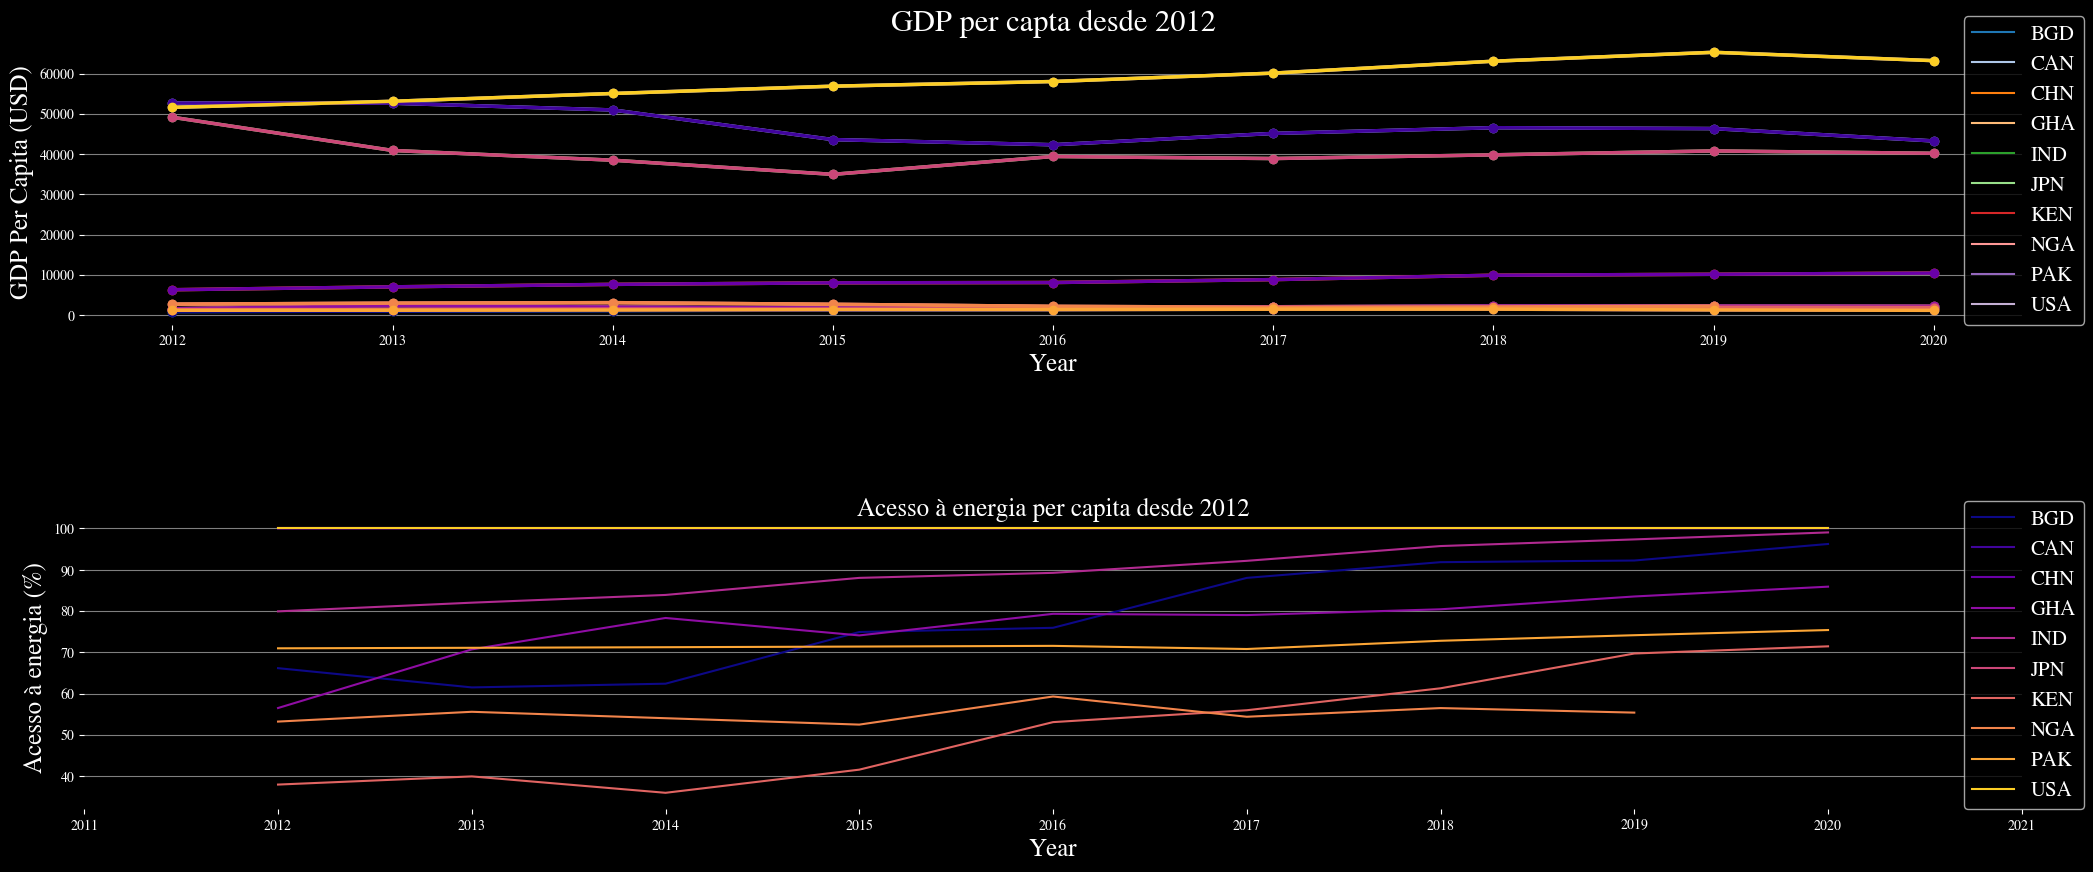

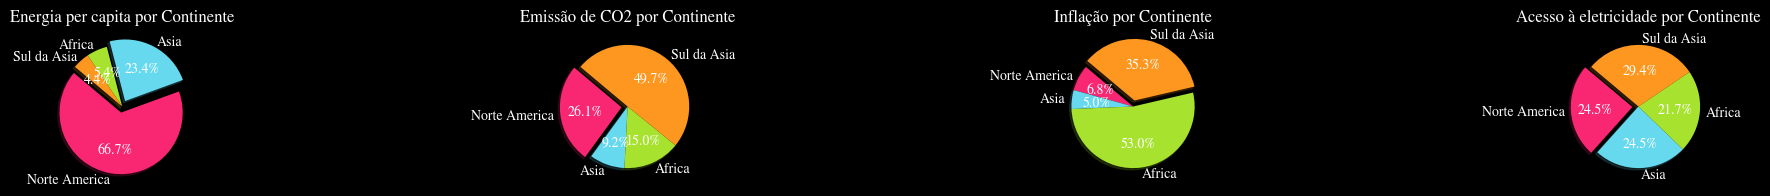

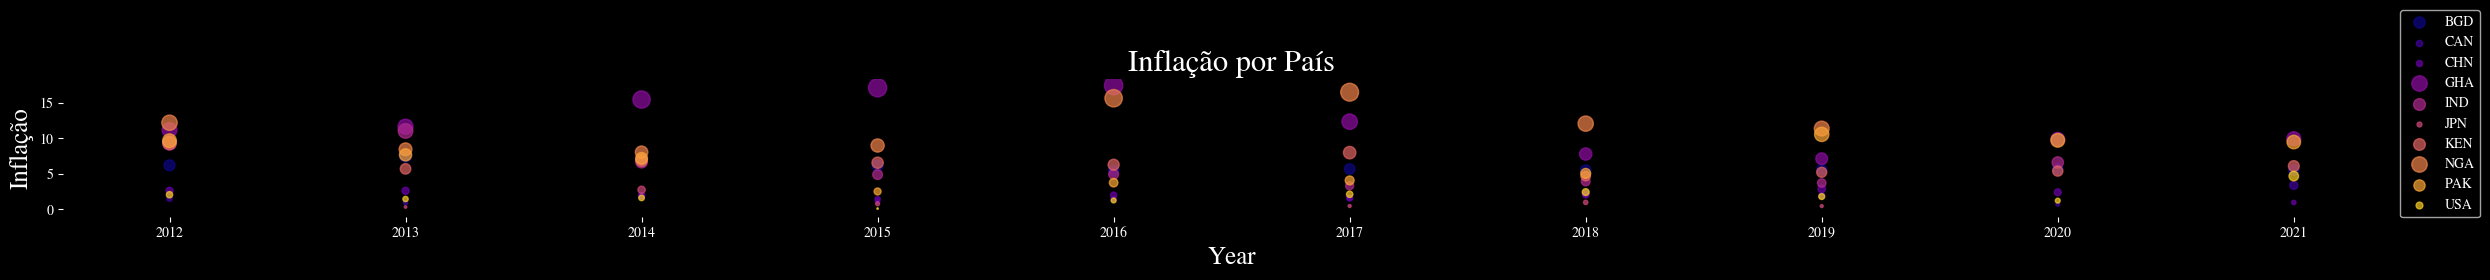

In [33]:
# Tema Escuro
plt.style.use('dark_background')

### 1-Gráfico de GDP per capta
dimensao, dash1 = plt.subplots(2, 1, figsize = (25, 10))
plt.subplots_adjust(hspace = 0.7)
for pos, paises in enumerate(country):
    dash1[0].plot(countryData.loc[countryData["country"] == paises, "year"], countryData.loc[countryData["country"] == paises, "GDP Per Capita (USD)"], label = paises, color = plt.cm.tab20(pos))
dash1[0].set_xlabel("Year", fontsize = 15)
dash1[0].set_ylabel("GDP Per Capita (USD)", fontsize = 15)
dash1[0].set_title("GDP per capta desde 2012", fontsize = 18)
dash1[0].legend(loc=(0.97, 0), prop = {"size": 15})
dash1[0].spines["top"].set_visible(False)
dash1[0].spines["right"].set_visible(False)
dash1[0].spines["left"].set_visible(False)
dash1[0].spines["bottom"].set_visible(False)
dash1[0].grid(axis = "y", alpha = 0.5)

# Cores vibrantes
cmap = plt.cm.get_cmap('plasma')  # ou 'viridis', 'inferno' etc.
for pos, paises in enumerate(country):
    dash1[0].plot(countryData.loc[countryData["country"] == paises, "year"],
                  countryData.loc[countryData["country"] == paises, "GDP Per Capita (USD)"],
                  label=paises, color=cmap(pos / len(country)))  # Substitua ... pelos argumentos corretos

# Fontes claras e legíveis
plt.rcParams['font.family'] = 'STIXGeneral'  # Use uma fonte disponível
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
dash1[0].set_xlabel("Year", fontsize = 18)
dash1[0].set_ylabel("GDP Per Capita (USD)", fontsize = 18)
dash1[0].set_title("GDP per capta desde 2012", fontsize = 22)

# Linhas mais espessas e marcadores
for line in dash1[0].lines:
    line.set_linewidth(2.5)  # Ajuste a espessura
    line.set_marker('o')  # Adiciona marcadores



### 2-Gráfico de acesso à eletricidade

cmap = plt.cm.get_cmap('plasma')  # ou 'viridis', 'inferno' etc.

for pos, paises in enumerate(country):
    dash1[1].plot(countryData.loc[countryData["country"] == paises, "year"],
                  countryData.loc[countryData["country"] == paises, "Access to electricity"],
                  label=paises, color=cmap(pos / len(country)));

dash1[1].legend(loc=(0.97, 0), prop={"size": 15})
dash1[1].spines["top"].set_visible(False)
dash1[1].spines["bottom"].set_visible(False)
dash1[1].spines["right"].set_visible(False)
dash1[1].spines["left"].set_visible(False)
dash1[1].grid(axis="y", alpha=0.5)
dash1[1].set_ylim(32, 101)
dash1[1].set_xticks(range(2011, 2022, 1))  # Ajuste o intervalo de anos se necessário
dash1[1].set_title("Acesso à energia per capita desde 2012", fontsize=18)
dash1[1].set_xlabel("Year", fontsize=18)
dash1[1].set_ylabel("Acesso à energia (%)", fontsize=18)  # Adicione a unidade de medida


### 3-GRÁFICOS DE PIZZA

regions, countryPerData = separacaoRegiao(countryData, "Energy use per capita")

# Paleta de cores vibrantes adaptada ao tema escuro
colors = ['#F92672', '#66D9EF', '#A6E22E', '#FD971F']  # Exemplos de cores vibrantes

dimensao, dash = plt.subplots(1, 4, figsize=(25, 2))
plt.subplots_adjust(hspace=2)

# Ajustes para o tema escuro
plt.style.use('dark_background')  # Fundo escuro
plt.rcParams['text.color'] = 'white'  # Texto em branco

dash[0].pie(countryPerData, explode=(0.1, 0.1, 0, 0), labels=regions, colors=colors,
           autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 10})
dash[0].set_title("Energia per capita por Continente", fontsize=12)  # Ajuste o tamanho da fonte


## Gráfico de pizza 2

regions, countryPerData = separacaoRegiao(countryData, "co2 emissions")

# Reutilizando a paleta de cores vibrantes
colors = ['#F92672', '#66D9EF', '#A6E22E', '#FD971F']

# Ajustes para o tema escuro já foram aplicados no código anterior

dash[1].pie(countryPerData, explode=(0.1, 0, 0, 0), labels=regions, colors=colors,
           autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 10})
dash[1].set_title("Emissão de CO2 por Continente", fontsize=12)  # Ajuste o tamanho da fonte


## Gráfico de pizza 3
regions, countryPerData = separacaoRegiao(countryData, "Inflation")

# #Reutilizando a paleta de cores vibrantes
colors = ['#F92672', '#66D9EF', '#A6E22E', '#FD971F']

# Ajustes para o tema escuro já foram aplicados no código anterior
dash[2].pie(countryPerData, explode=(0, 0, 0, 0.1), labels=regions, colors=colors,
           autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 10})
dash[2].set_title("Inflação por Continente", fontsize=12)  # Ajuste o tamanho da fonte


 ## Gráfico de pizza 4 (PIZZA CHAT)
regions, countryPerData = separacaoRegiao(countryData, "Access to electricity")

# Reutilizando a paleta de cores vibrantes
colors = ['#F92672', '#66D9EF', '#A6E22E', '#FD971F']

# Ajustes para o tema escuro já foram aplicados no código anterior

dash[3].pie(countryPerData, explode=(0.1, 0, 0, 0), labels=regions, colors=colors,
           autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 10})
dash[3].set_title("Acesso à eletricidade por Continente", fontsize=12)  # Ajuste o tamanho da fonte


# Verificar valores ausentes em 'Inflation'
print(countryData['Inflation'].isnull().sum())

# Remover linhas com valores ausentes (opcional)
countryData.dropna(subset=['Inflation'], inplace=True)


### 4-Gráfico de inflação por Continente (BUBLLE CHART)
plt.figure(figsize=(25, 2.5))

# Cores vibrantes
cmap = plt.cm.get_cmap('plasma') # Escolhe o mapa de cores 'plasma' para cores vibrantes

for i, pais in enumerate(country):  # Itera sobre cada país e seu índice na lista 'country'
    plt.scatter(countryData.loc[countryData['country'] == pais, "year"],  # Define os valores do eixo x (ano) para cada país
                countryData.loc[countryData['country'] == pais, 'Inflation'],  # Define os valores do eixo y (inflação) para cada país
                alpha=0.7,  # Define a opacidade das bolhas (0 = transparente, 1 = opaco)
                color=cmap(i / len(country)),  # Define a cor de cada bolha com base no índice e no número de países
                label=pais,  # Define o rótulo de cada bolha com o nome do país
                s=countryData.loc[countryData['country'] == pais, 'Inflation'] * 10)
                # Define o tamanho da bolha proporcional ao valor da inflação


# Ajustes para o tema escuro
plt.style.use('dark_background')  # Define o estilo do gráfico como 'dark_background' para fundo escuro
plt.rcParams['text.color'] = 'white'  # Define a cor do texto como branco para melhor visibilidade


# Remove as bordas do gráfico
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

# Define os rótulos do eixo x (anos) e sua cor
plt.xticks(range(2012, 2022, 1), color='white')

# Define a cor dos rótulos do eixo y
plt.yticks(color='white')

# Define o rótulo do eixo x, seu tamanho e cor
plt.xlabel("Year", fontsize=18, color='white')

# Define o rótulo do eixo y, seu tamanho e cor
plt.ylabel("Inflação", fontsize=18, color='white')

# Define o título do gráfico, seu tamanho e cor
plt.title("Inflação por País", fontsize=22, color='white')

# Define a posição da legenda e o tamanho da fonte
plt.legend(loc=(1, 0), prop={'size': 10})

# Ajustar espaçamento entre os gráficos
plt.tight_layout()

# Salvar a imagem
plt.savefig("project_2.png", dpi=300)  # # Nome do arquivo a sua escolha e DPI

plt.show()














